In [6]:
# First, we will define our DataFrame with the required columns: 'open', 'high', 'low', 'close'.
# We will then define the functions for calculating each volatility measure and apply them to the DataFrame.
# Finally, we will print out the DataFrame with the volatility measures.
import pandas as pd
import numpy as np
#from vol import *

### One day realised vol

In [7]:
# Defining the volatility measures calculation functions
def close_to_close_volatility(df, window):
    log_returns = np.log(df['close'] / df['close'].shift(1))
    return log_returns.rolling(window).std() * np.sqrt(252)

def parkinson_volatility(df, window):
    factor = 1 / (4 * np.log(2))
    hl_ratio = (np.log(df['high'] / df['low']))**2
    return np.sqrt(hl_ratio.rolling(window).mean() * factor * 252)

def garman_klass_volatility(df, window):
    factor = 0.5 * np.log(df['high'] / df['low'])**2 - (2 * np.log(2) - 1) * np.log(df['close'] / df['open'])**2
    return np.sqrt(factor.rolling(window).mean() * 252)

In [21]:
# Fake market data
# Generating a DataFrame with simulated open, high, low, close prices
np.random.seed(0)  # Seed for reproducibility
prices = {
    'open': np.random.uniform(low=100, high=200, size=1000),
    'high': np.random.uniform(low=200, high=300, size=1000),
    'low': np.random.uniform(low=80, high=100, size=1000),
    'close': np.random.uniform(low=100, high=200, size=1000)
}
df = pd.DataFrame(prices)
df

,open,high,low,close
0,154.881350,259.288027,96.230369,141.396250
1,171.518937,201.006370,89.521680,162.961830
2,160.276338,247.582620,90.463120,177.858426
3,154.488318,270.877039,85.010412,185.155779
4,142.365480,204.397543,92.100860,181.641271
...,...,...,...,...
995,109.767637,279.128155,98.833741,134.963937
996,151.492220,272.119811,90.922655,143.487363
997,193.841202,248.010781,86.472274,183.000295
998,122.864655,264.386404,96.270900,193.280618


In [32]:
# Calculating the volatility measures with a rolling window of 10 days
window_size = 10
df['Close_to_Close_Vol'] = close_to_close_volatility(df, window_size)
df['Parkinson_Vol'] = parkinson_volatility(df, window_size)
df['Garman_Klass_Vol'] = garman_klass_volatility(df, window_size)
df

,open,high,low,close,Close_to_Close_Vol,Parkinson_Vol,Garman_Klass_Vol
0,154.881350,259.288027,96.230369,141.396250,NaN,NaN,NaN
1,171.518937,201.006370,89.521680,162.961830,NaN,NaN,NaN
2,160.276338,247.582620,90.463120,177.858426,NaN,NaN,NaN
3,154.488318,270.877039,85.010412,185.155779,NaN,NaN,NaN
4,142.365480,204.397543,92.100860,181.641271,NaN,NaN,NaN
...,...,...,...,...,...,...,...
995,109.767637,279.128155,98.833741,134.963937,3.675390,9.846930,11.042348
996,151.492220,272.119811,90.922655,143.487363,3.032190,9.966769,11.344583
997,193.841202,248.010781,86.472274,183.000295,3.209413,9.946011,11.446594
998,122.864655,264.386404,96.270900,193.280618,2.996900,9.948024,11.368182


### %-ile rank and z-score over a time window

In [33]:
import pandas as pd
import numpy as np

def percentile_rank(df, window=252):
    """
    Calculate percentile rank for each column in a DataFrame using a rolling window.
    
    Parameters:
        df (DataFrame): Input DataFrame containing the data.
        window (int): Rolling window size (default is 252 for 1 year).
    
    Returns:
        DataFrame: A new DataFrame with percentile ranks for each column.
    """
    # Create a new DataFrame for percentile ranks
    percentile_rank_df = pd.DataFrame()

    # Calculate percentile rank for each column with the specified rolling window
    for column in df.columns:
        percentile_rank_series = df[column].rolling(window=window).apply(
            lambda x: (pd.Series(x).rank(pct=True).iloc[-1] * 100) if len(x) >= window else None
        )
        percentile_rank_df[column] = percentile_rank_series

    return percentile_rank_df

def z_score(df, window=252):
    """
    Calculate Z-scores for each column in a DataFrame using a rolling window.
    
    Parameters:
        df (DataFrame): Input DataFrame containing the data.
        window (int): Rolling window size (default is 252 for 1 year).
    
    Returns:
        DataFrame: A new DataFrame with Z-scores for each column.
    """
    # Create a new DataFrame for Z-scores
    z_score_df = pd.DataFrame()

    # Calculate Z-scores for each column with the specified rolling window
    for column in df.columns:
        rolling_mean = df[column].rolling(window=window, min_periods=1).mean()
        rolling_std = df[column].rolling(window=window, min_periods=1).std()
        z_score_series = (df[column] - rolling_mean) / rolling_std
        z_score_df[column] = z_score_series

    return z_score_df

In [36]:
# Assuming 'df' is your original DataFrame
# You can specify the window size (1 year = 252 trading days) as needed
window_size = 252

In [40]:
# Calculate and display the percentile ranks with the rolling window
percentile_rank_df = percentile_rank(df, window=window_size)
print("Percentile Rank DataFrame (using a rolling window of", window_size, "trading days):")
percentile_rank_df.tail()

Percentile Rank DataFrame (using a rolling window of 252 trading days):


,open,high,low,close,Close_to_Close_Vol,Parkinson_Vol,Garman_Klass_Vol
995,6.746032,77.777778,93.253968,42.063492,18.253968,50.396825,35.714286
996,54.761905,71.825397,57.936508,50.000000,5.158730,63.095238,59.523810
997,95.634921,46.428571,35.714286,85.317460,6.746032,60.714286,67.857143
998,21.825397,63.492063,79.761905,94.444444,5.158730,61.507937,60.714286
999,65.476190,48.412698,68.650794,34.126984,12.301587,44.444444,53.174603


In [39]:
# Calculate and display the Z-scores with the rolling window
z_score_df = z_score(df, window=window_size)
print("\nZ-Score DataFrame (using a rolling window of", window_size, "trading days):")
z_score_df.tail()


Z-Score DataFrame (using a rolling window of 252 trading days):


,open,high,low,close,Close_to_Close_Vol,Parkinson_Vol,Garman_Klass_Vol
995,-1.424971,0.961026,1.513836,-0.393331,-0.923104,0.072545,-0.408050
996,0.029562,0.730788,0.190536,-0.093380,-1.571392,0.417361,0.298016
997,1.492923,-0.072383,-0.555947,1.311632,-1.386982,0.368283,0.545688
998,-0.971923,0.471426,1.086453,1.660641,-1.599046,0.379927,0.366764
999,0.593523,-0.013504,0.691706,-0.556212,-1.171695,-0.122349,0.072818


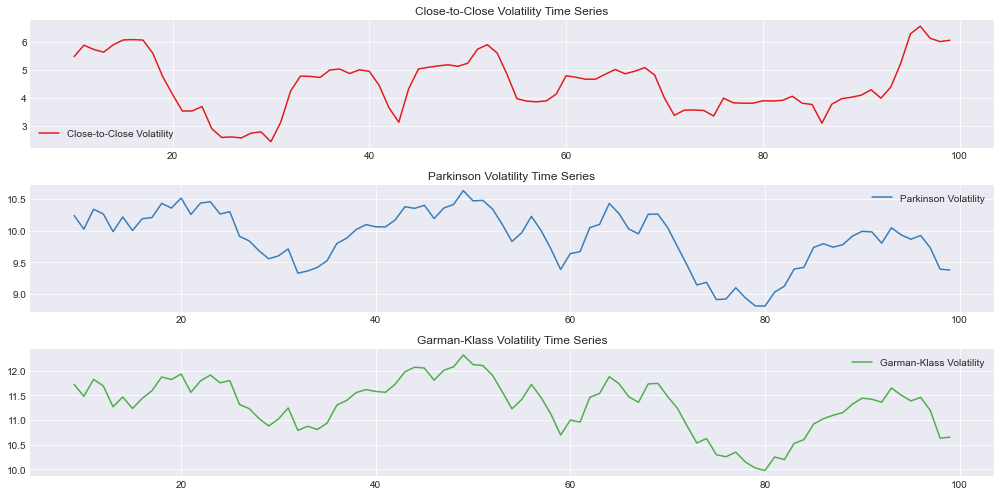

In [11]:
import matplotlib.pyplot as plt

# Plot settings
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

# Plotting Close-to-Close Volatility
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.plot(df['Close_to_Close_Volatility'], color=palette(0), label='Close-to-Close Volatility')
plt.title('Close-to-Close Volatility Time Series')
plt.legend()

# Plotting Parkinson Volatility
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.plot(df['Parkinson_Volatility'], color=palette(1), label='Parkinson Volatility')
plt.title('Parkinson Volatility Time Series')
plt.legend()

# Plotting Garman-Klass Volatility
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.plot(df['Garman_Klass_Volatility'], color=palette(2), label='Garman-Klass Volatility')
plt.title('Garman-Klass Volatility Time Series')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

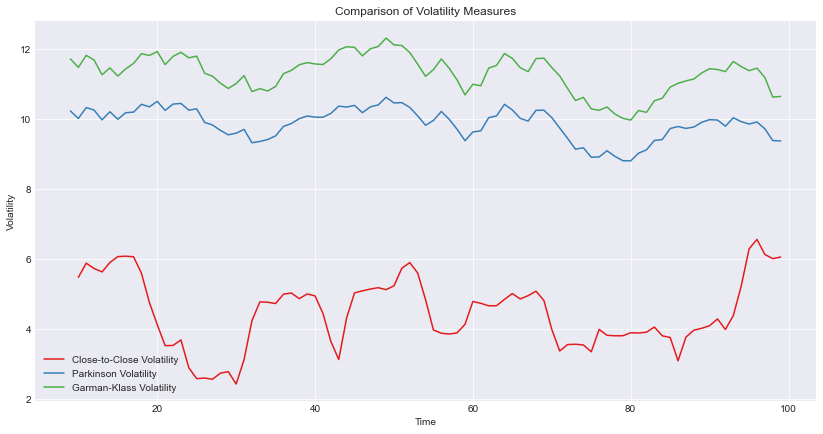

In [40]:
# Plotting all volatility measures together for comparison

plt.figure(figsize=(14, 7))
plt.plot(df['Close_to_Close_Volatility'], label='Close-to-Close Volatility', color=palette(0))
plt.plot(df['Parkinson_Volatility'], label='Parkinson Volatility', color=palette(1))
plt.plot(df['Garman_Klass_Volatility'], label='Garman-Klass Volatility', color=palette(2))

plt.title('Comparison of Volatility Measures')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

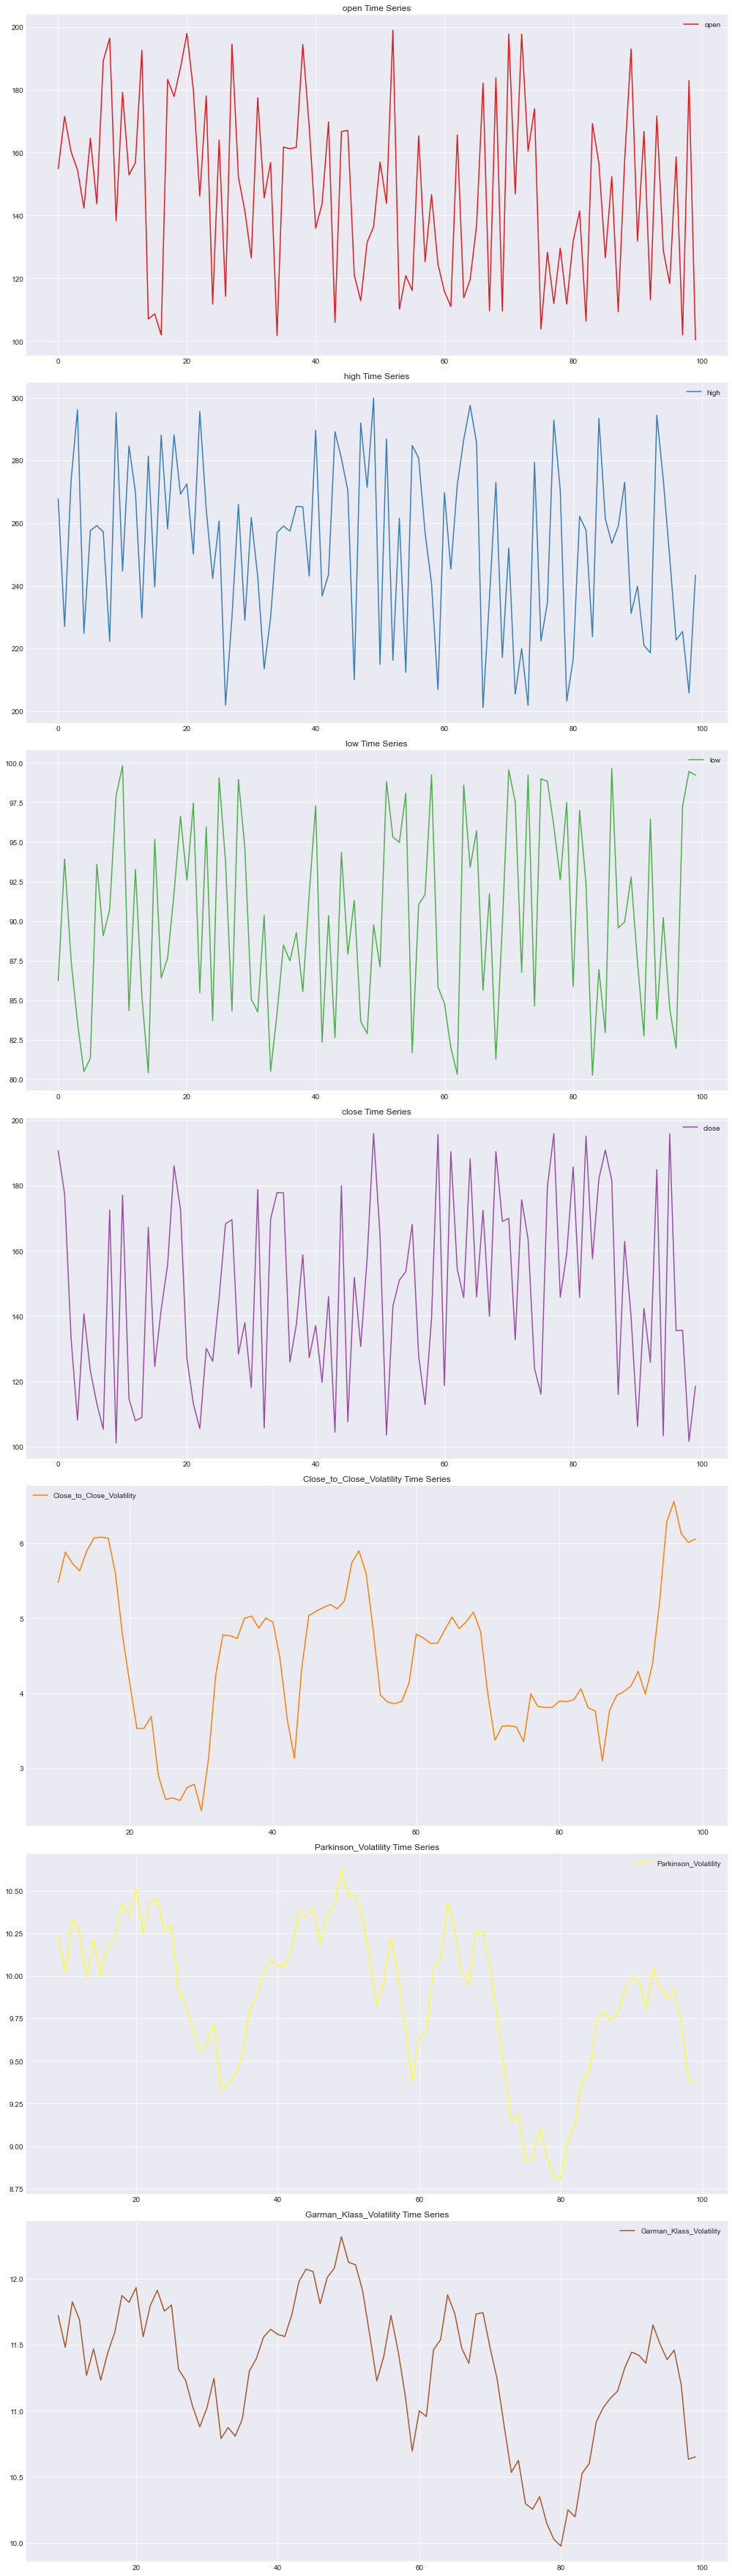

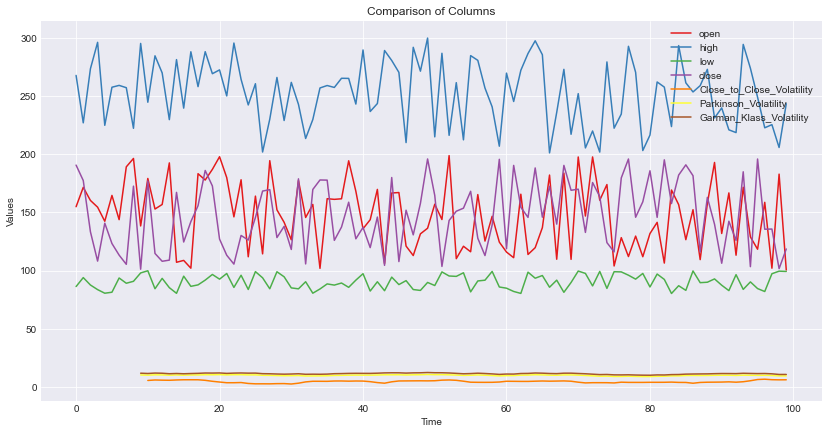

In [41]:
import matplotlib.pyplot as plt

def plot_columns(df):
    # Plot settings
    plt.style.use('seaborn-darkgrid')
    palette = plt.get_cmap('Set1')

    # Plot each column separately in subplots
    num_columns = len(df.columns)
    plt.figure(figsize=(14, 7 * num_columns))
    
    for i, column in enumerate(df.columns):
        plt.subplot(num_columns, 1, i + 1)  # Number of rows = num_columns, 1 column, i+1 subplot
        plt.plot(df[column], color=palette(i), label=column)
        plt.title(f'{column} Time Series')
        plt.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

    # Plot all columns together for comparison
    plt.figure(figsize=(14, 7))
    for i, column in enumerate(df.columns):
        plt.plot(df[column], label=column, color=palette(i))

    plt.title('Comparison of Columns')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

# Usage example:
# Assuming you have a DataFrame named 'df' with the columns you want to plot
plot_columns(df)


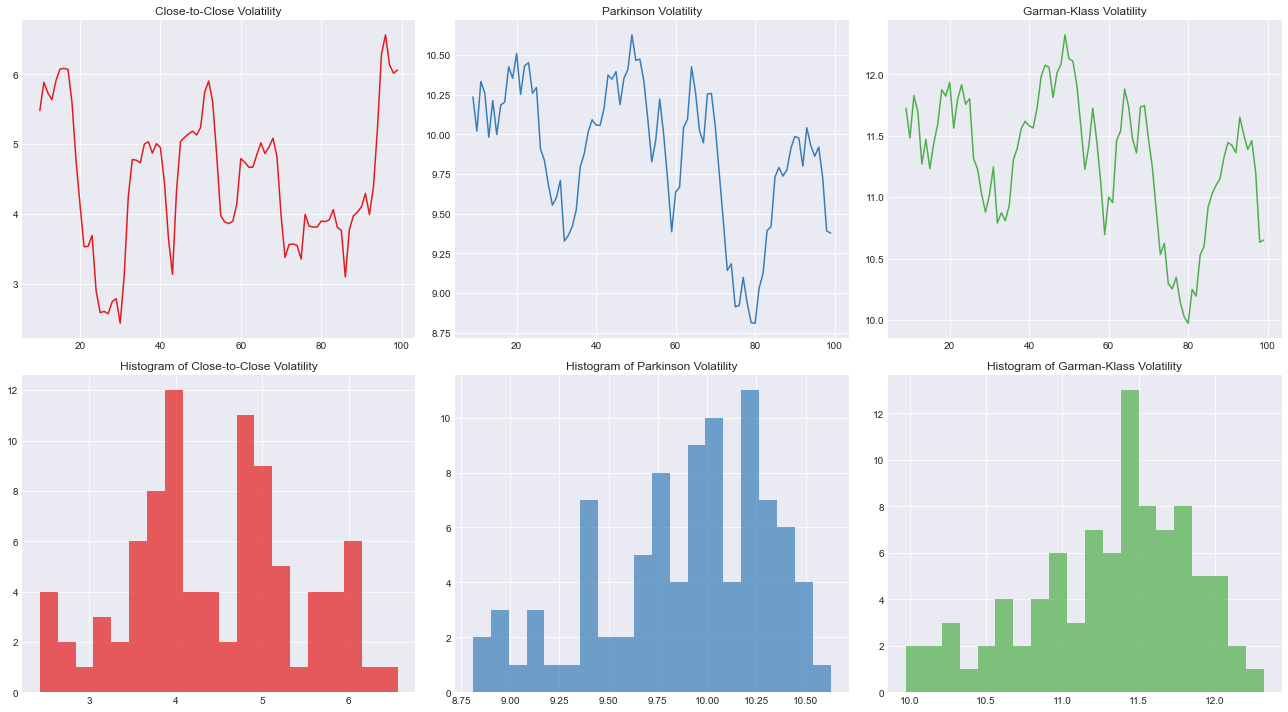

In [42]:
# Calculating the volatility measures with a rolling window of 10 days
window_size = 10
df['Close_to_Close_Volatility'] = close_to_close_volatility(df, window_size)
df['Parkinson_Volatility'] = parkinson_volatility(df, window_size)
df['Garman_Klass_Volatility'] = garman_klass_volatility(df, window_size)

# Plotting time series and histograms
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

# Time Series Plot for each volatility measure
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.plot(df['Close_to_Close_Volatility'], label='Close-to-Close', color=palette(0))
plt.title('Close-to-Close Volatility')

plt.subplot(2, 3, 2)
plt.plot(df['Parkinson_Volatility'], label='Parkinson', color=palette(1))
plt.title('Parkinson Volatility')

plt.subplot(2, 3, 3)
plt.plot(df['Garman_Klass_Volatility'], label='Garman-Klass', color=palette(2))
plt.title('Garman-Klass Volatility')

# Histograms for each volatility measure
plt.subplot(2, 3, 4)
plt.hist(df['Close_to_Close_Volatility'].dropna(), bins=20, color=palette(0), alpha=0.7)
plt.title('Histogram of Close-to-Close Volatility')

plt.subplot(2, 3, 5)
plt.hist(df['Parkinson_Volatility'].dropna(), bins=20, color=palette(1), alpha=0.7)
plt.title('Histogram of Parkinson Volatility')

plt.subplot(2, 3, 6)
plt.hist(df['Garman_Klass_Volatility'].dropna(), bins=20, color=palette(2), alpha=0.7)
plt.title('Histogram of Garman-Klass Volatility')

plt.tight_layout()
plt.show()

<Figure size 1008x504 with 0 Axes>

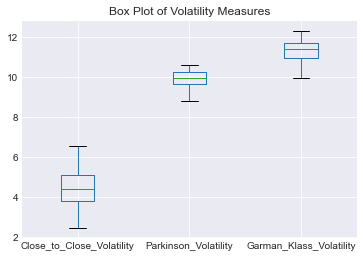

In [43]:
# Continuing with the rest of the proposed plots.

# Box Plot of volatility measures
plt.figure(figsize=(14, 7))
volatility_measures = ['Close_to_Close_Volatility', 'Parkinson_Volatility', 'Garman_Klass_Volatility']
df[volatility_measures].plot(kind='box')
plt.title('Box Plot of Volatility Measures')
plt.show()

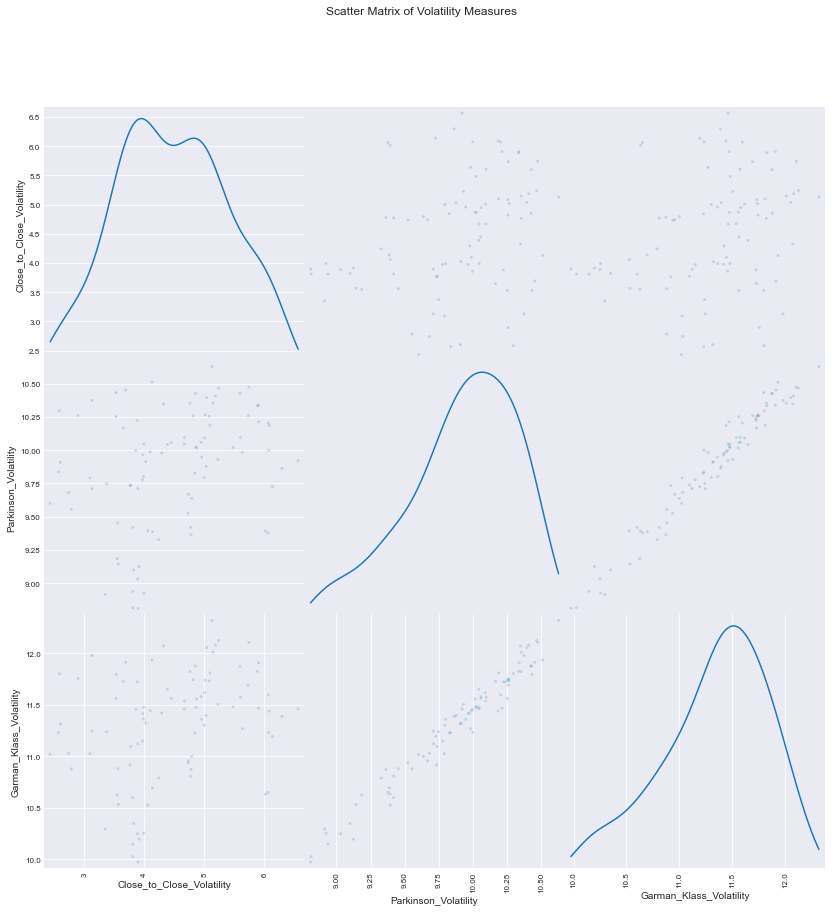

In [44]:
# Scatter Matrix (Pair Plot) of volatility measures
from pandas.plotting import scatter_matrix
scatter_matrix(df[volatility_measures], alpha=0.2, figsize=(14, 14), diagonal='kde')
plt.suptitle('Scatter Matrix of Volatility Measures')
plt.show()

In [45]:
# Adjusting the custom colormap to have light green for low values and light red for high values

# Define a new set of RGB colors for the heatmap with a smooth transition from light green to light red
# Starting with light green for low values and moving to white then light red for high values
my_colors = [(0.5, 1, 0.5),  # light green for low values
             (1, 1, 1),      # white for middle values
             (1, 0.5, 0.5)]  # light red for high values

# Create a custom colormap
my_cmap = LinearSegmentedColormap.from_list("my_cmap", my_colors)

# Now, let's create the correlation heatmap with your custom colors
correlation_matrix = df[volatility_measures].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=my_cmap, vmin=-1, vmax=1)
plt.title('Volatility Measures Correlation Heatmap')
plt.show()



NameError: name 'LinearSegmentedColormap' is not defined